In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1513,ham,Hows the champ just leaving glasgow!,NaN,NaN,NaN
449,ham,10 min later k...,NaN,NaN,NaN
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...,NaN,NaN,NaN
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!,NaN,NaN,NaN
2283,ham,I reach home safe n sound liao...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
## drop last 3 columns as we have very limited data
df1 =df.copy()
df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
df1.sample(5)

,v1,v2
5324,ham,"Dear Sir,Salam Alaikkum.Pride and Pleasure mee..."
796,spam,"Orange customer, you may now claim your FREE C..."
4329,ham,i thought we were doing a king of the hill thi...
2087,ham,\alright babe
2614,ham,"Sir, hope your day is going smoothly. i really..."


In [8]:
# renaming columns
df1.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df1.sample(5)

,target,text
5125,ham,After my work ah... Den 6 plus lor... U workin...
817,ham,Also are you bringing galileo or dobby
1984,spam,Urgent! Please call 09061743810 from landline....
607,ham,what I meant to say is cant wait to see u agai...
4672,ham,I forgot 2 ask Ì_ all smth.. There's a card on...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df1['target']= encoder.fit_transform(df1['target'])

In [10]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df1.duplicated().sum()

403

In [13]:
## Drop the duplicated values
df1 = df1.drop_duplicates(keep='first')

In [14]:
df1.duplicated().sum()

0

In [15]:
df1.shape

(5169, 2)

## 2. EDA

In [16]:
df1['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

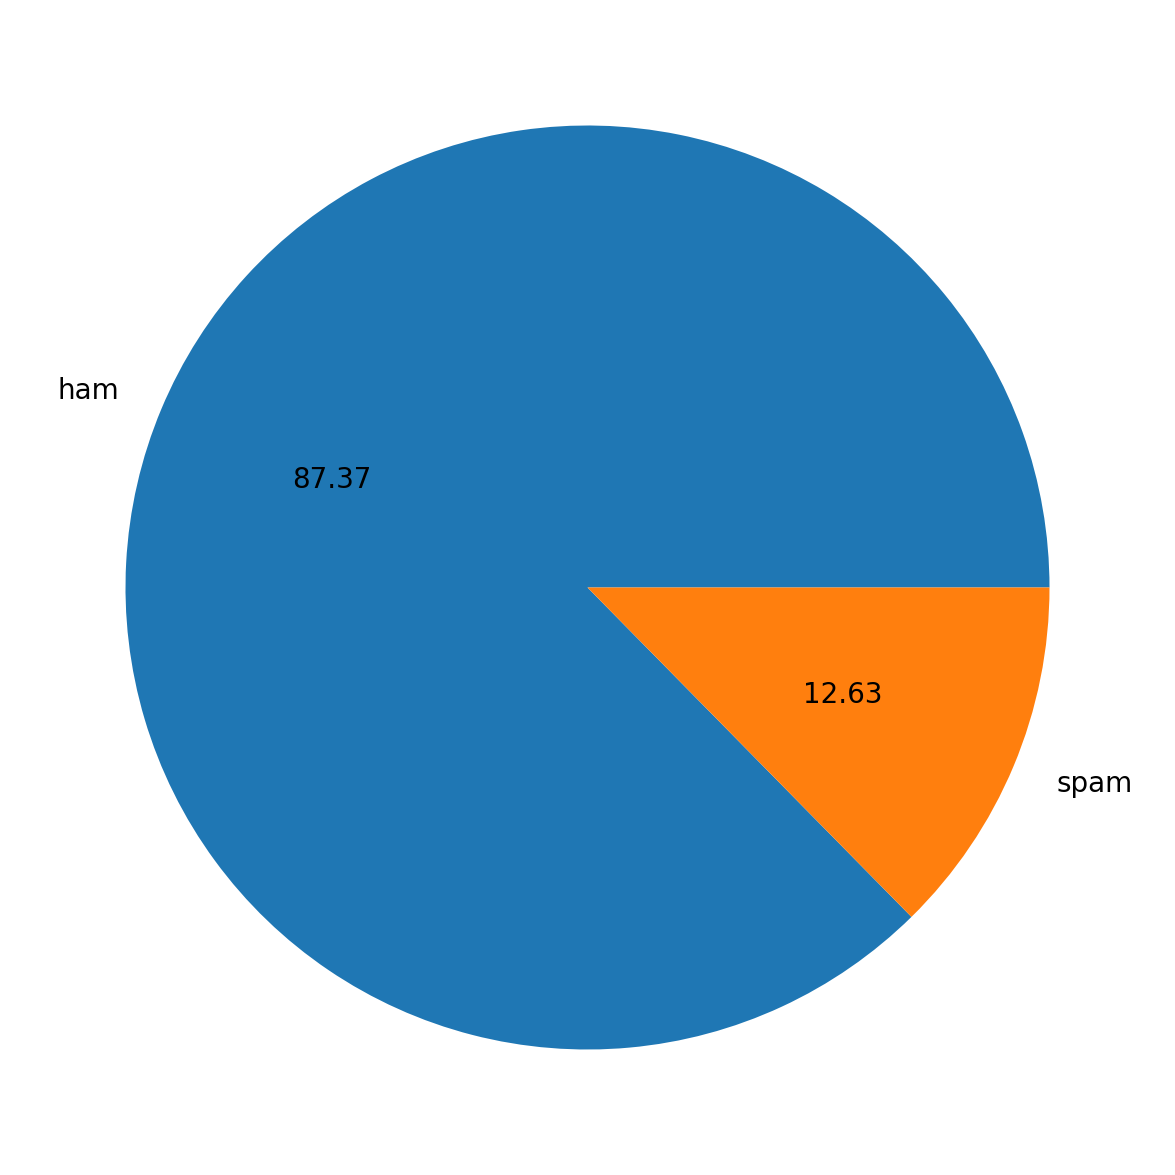

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size':20})
plt.pie(df1['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

***Target label is clearly inbalanced***

Ham values are way more than spam values

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rajesh
[nltk_data]     kalavala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
## Characters in each sms
df1['num_character']= df1.text.apply(len)

In [21]:
df1.sample(5)

,target,text,num_character
4461,0,"Sorry I flaked last night, shit's seriously go...",95
114,0,"Wa, ur openin sentence very formal... Anyway, ...",143
687,0,"Dear,Me at cherthala.in case u r coming cochin...",169
2293,0,Hello. Damn this christmas thing. I think i ha...,91
4325,0,That seems unnecessarily hostile,32


In [22]:
## number of words
df1['num_words']= df1.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df1.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df1['num_sentences']= df1.text.apply(lambda x: len(nltk.sent_tokenize(x)))
df1.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df1.describe()

,target,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
# for HAM messages 
df1[df1.target==0].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# for SPAM messages 
df1[df1.target==1].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


**Seems like SPAM messages are usually longer and have more number of words and sentences**

### Let's visualize our findings

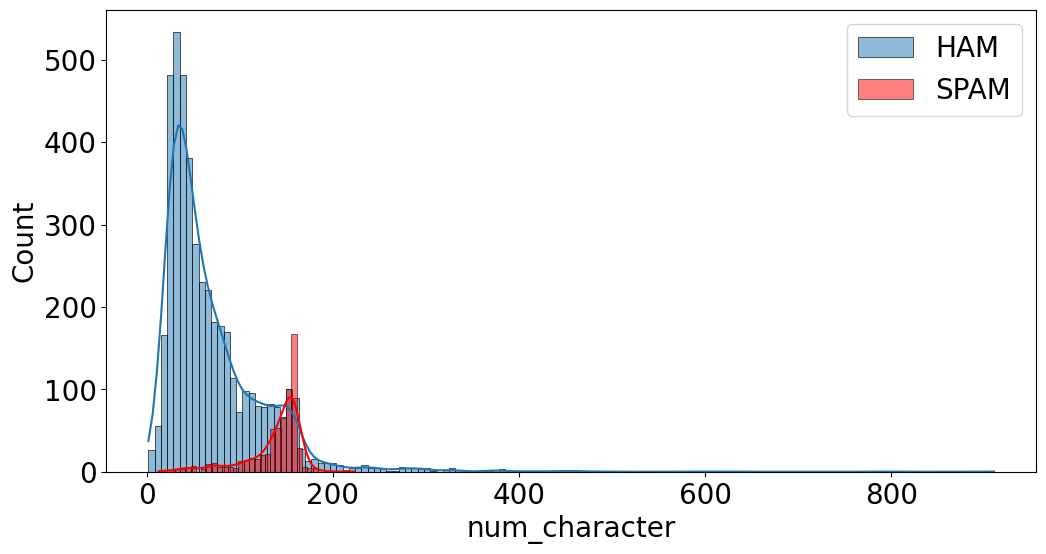

In [28]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_character'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_character'],color='red',label='SPAM',kde=True)
plt.legend()


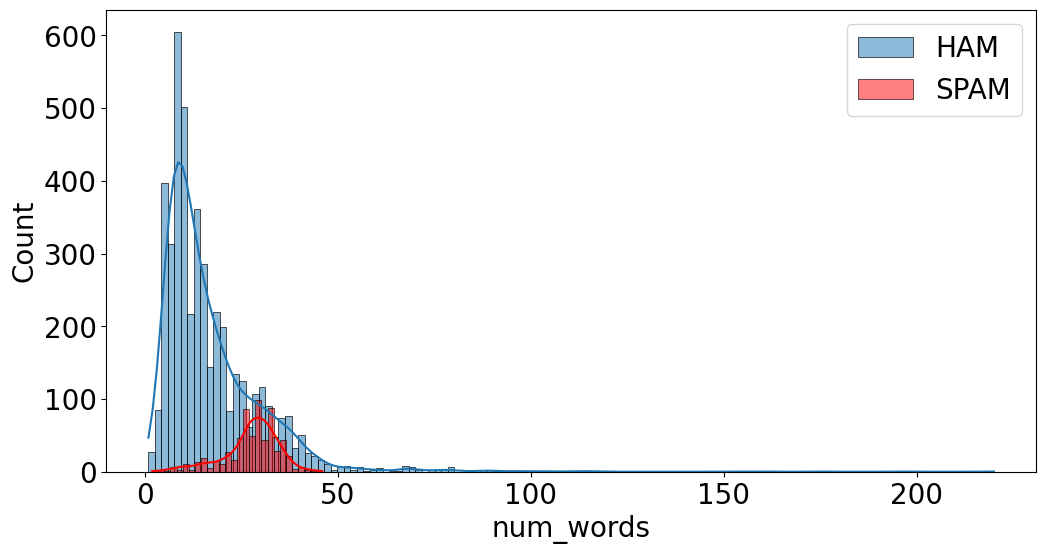

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_words'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_words'],color='red',label='SPAM',kde=True)
plt.legend()

In [89]:
## Correlation
df1.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

C:\Users\Rajesh kalavala\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

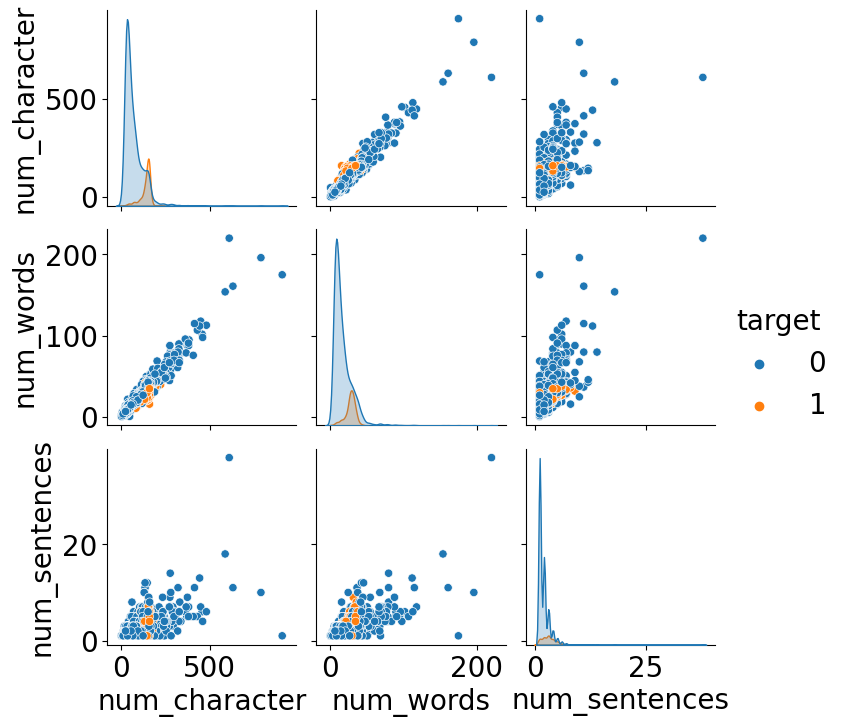

In [31]:
plt.figure(figsize=(15,10))
sns.pairplot(df1, hue='target')

In [32]:
## Visualize correlation using SNS heatmap
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':10})
sns.heatmap(df1.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

<Figure size 1500x1000 with 0 Axes>

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rajesh
[nltk_data]     kalavala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## 3. Data preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [36]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text =  text.lower()
    text =  nltk.word_tokenize(text)
    ps = PorterStemmer()
    y=[]
    k=[]
    # remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    # remove stop words and punctuations
    for j in y:
        if j not in stopwords.words('english') and j not in string.punctuation:
            k.append(j)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    

    return " ".join(y)

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [38]:
df1.text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
df1['transformed_text'] =  df1['text'].apply(transform_text)

In [40]:
df1.transformed_text.head()

0    go until jurong point crazi avail onli in bugi...
1                                ok lar joke wif u oni
2    free entri in 2 a wkli comp to win fa cup fina...
3          u dun say so earli hor u c alreadi then say
4    nah i do think he goe to usf he live around he...
Name: transformed_text, dtype: object

In [44]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   -------------------------------------- - 286.7/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00


In [45]:
from wordcloud import WordCloud

In [46]:
wc = WordCloud(width=1000, height=1000, min_font_size=14, background_color='white')

In [47]:
spam_wc= wc.generate(df1[df1['target']==1]['transformed_text'].str.cat(sep=' '))

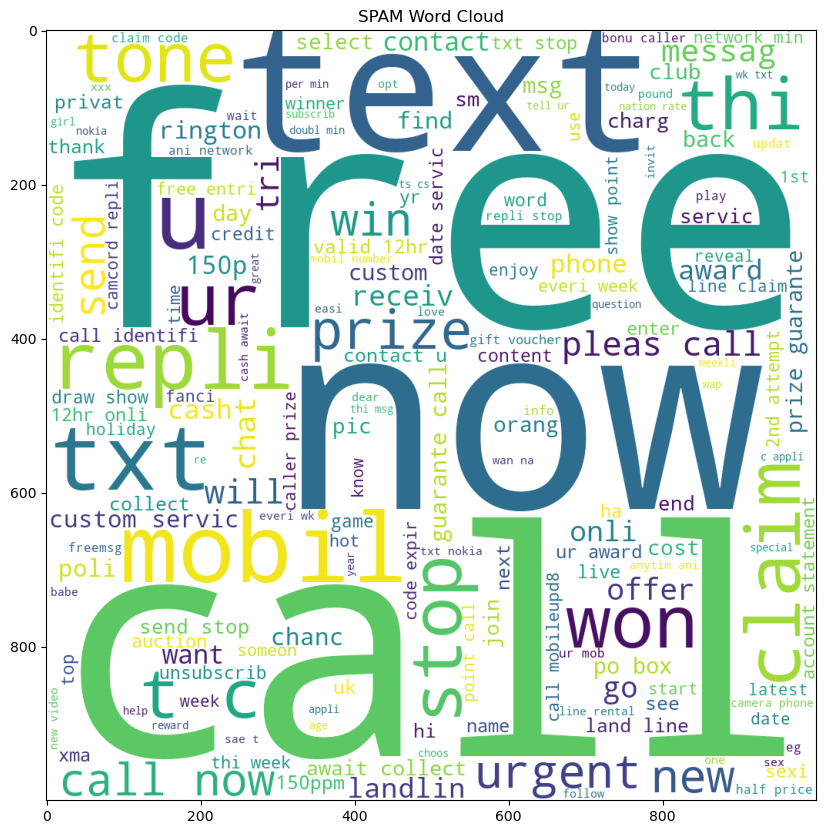

In [48]:
# plotting word cloud for spam messages
plt.figure(figsize=(15,10))
plt.title('SPAM Word Cloud')
plt.imshow(spam_wc)

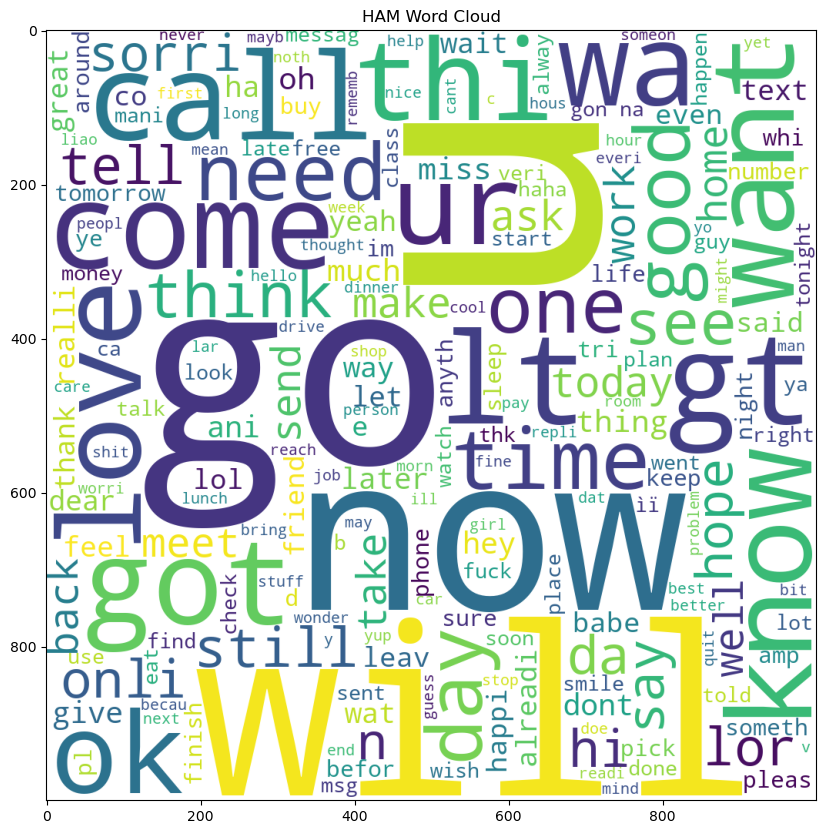

In [49]:
ham_wc= wc.generate(df1[df1['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,10))
plt.title('HAM Word Cloud')
plt.imshow(ham_wc)


In [50]:
ham_corp = []
for msg in df1[df1['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corp.append(word)

In [51]:
spam_corp=[]
for msg in df1[df1['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corp.append(word)

In [52]:
from collections import Counter
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})
sns.barplot(pd.DataFrame(Counter(spam_corp).most_common(20))[0], pd.DataFrame(Counter(spam_corp).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1500x1000 with 0 Axes>

In [53]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})
sns.barplot(pd.DataFrame(Counter(ham_corp).most_common(20))[0], pd.DataFrame(Counter(ham_corp).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1500x1000 with 0 Axes>

## 4. Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(df1['transformed_text']).toarray()



In [55]:
X.shape

(5169, 6796)

In [56]:
Y =df1.target.values

In [57]:
Y

array([0, 0, 1, ..., 0, 0, 0])

##### Train test split

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

#### Naive Baye's Classifier (Bag of words)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(x_train, y_train)
y_pred1 =  gnb.predict(x_test)
print ('Accuracy Score GNB')
print(accuracy_score(y_test, y_pred1))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

Accuracy Score GNB
0.8887814313346228
#############################
CM
[[801  95]
 [ 20 118]]
#############################
Precision Score
0.5539906103286385


In [62]:
mnb.fit(x_train, y_train)
y_pred2 =  mnb.predict(x_test)
print ('Accuracy Score MNB')
print(accuracy_score(y_test, y_pred2))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred2))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred2))

Accuracy Score MNB
0.9671179883945842
#############################
CM
[[874  22]
 [ 12 126]]
#############################
Precision Score
0.8513513513513513


In [63]:
bnb.fit(x_train, y_train)
y_pred3 =  bnb.predict(x_test)
print ('Accuracy Score BNB')
print (accuracy_score(y_test, y_pred3))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred3))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred3))

Accuracy Score BNB
0.9748549323017408
#############################
CM
[[893   3]
 [ 23 115]]
#############################
Precision Score
0.9745762711864406


##### Naive Bayes (TFIDF Vectorizer)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)


In [65]:
X = tfidf.fit_transform(df1['transformed_text']).toarray()
Y =df1.target.values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [66]:
gnb.fit(x_train, y_train)
y_pred1 =  gnb.predict(x_test)
print ('Accuracy Score GNB')
print(accuracy_score(y_test, y_pred1))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

Accuracy Score GNB
0.8771760154738878
#############################
CM
[[792 104]
 [ 23 115]]
#############################
Precision Score
0.5251141552511416


In [90]:
mnb.fit(x_train, y_train)
y_pred2 =  mnb.predict(x_test)
print ('Accuracy Score MNB')
print(accuracy_score(y_test, y_pred2))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred2))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred2))

Accuracy Score MNB
0.9680851063829787
#############################
CM
[[896   0]
 [ 33 105]]
#############################
Precision Score
1.0


In [68]:
bnb.fit(x_train, y_train)
y_pred3 =  bnb.predict(x_test)
print ('Accuracy Score BNB')
print (accuracy_score(y_test, y_pred3))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred3))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred3))

Accuracy Score BNB
0.9806576402321083
#############################
CM
[[893   3]
 [ 17 121]]
#############################
Precision Score
0.9758064516129032


In [71]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.3/99.8 MB 2.1 MB/s eta 0:00:48
    --------------------------------------- 1.8/99.8 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 3.3/99.8 MB 13.1 MB/s eta 0:00:08
   -- ------------------------------------- 6.4/99.8 MB 20.6 MB/s eta 0:00:05
   --- ------------------------------------ 9.2/99.8 MB 25.6 MB/s eta 0:00:04
   ----- ---------------------------------- 13.4/99.8 MB 59.5 MB/s eta 0:00:02
   ------- ---------------------------

***We want our classifier to be more precise than overall accuracy as the data is inbalanced***

##### I would go with ***MLB naive Bayes*** as precision score is the highest with TFIDF vectorizer

Before taking the decision of what algorith we should use, let's see how other classifier work with this problem

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [75]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [76]:
accuracy_s=[]
precision_s=[]

for name, clf in clfs.items():
    accuracy,precision = train_classifier(clf,x_train, y_train,x_test,y_test)
    print ("For {}".format(name) + ' Classifier')
    print ("Accuracy ----> {}".format(accuracy))
    print ("Precision ----> {}".format(precision))
    accuracy_s.append(accuracy)
    precision_s.append(precision)


For SVC Classifier
Accuracy ----> 0.9816247582205029
Precision ----> 0.983739837398374
For KN Classifier
Accuracy ----> 0.90715667311412
Precision ----> 1.0
For NB Classifier
Accuracy ----> 0.9680851063829787
Precision ----> 1.0
For DT Classifier
Accuracy ----> 0.9303675048355899
Precision ----> 0.84375
For LR Classifier
Accuracy ----> 0.9622823984526112
Precision ----> 0.9459459459459459
For RF Classifier
Accuracy ----> 0.9709864603481625
Precision ----> 1.0
For AdaBoost Classifier
Accuracy ----> 0.9700193423597679
Precision ----> 0.928
For BgC Classifier
Accuracy ----> 0.965183752417795
Precision ----> 0.9180327868852459
For ETC Classifier
Accuracy ----> 0.9787234042553191
Precision ----> 0.9833333333333333
For GBDT Classifier
Accuracy ----> 0.9593810444874274
Precision ----> 0.9528301886792453
For xgb Classifier
Accuracy ----> 0.9806576402321083
Precision ----> 0.9682539682539683


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_s,'Precision':precision_s}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.968085,1.000000
5,RF,0.970986,1.000000
0,SVC,0.981625,0.983740
8,ETC,0.978723,0.983333
10,xgb,0.980658,0.968254
9,GBDT,0.959381,0.952830
4,LR,0.962282,0.945946
6,AdaBoost,0.970019,0.928000
7,BgC,0.965184,0.918033


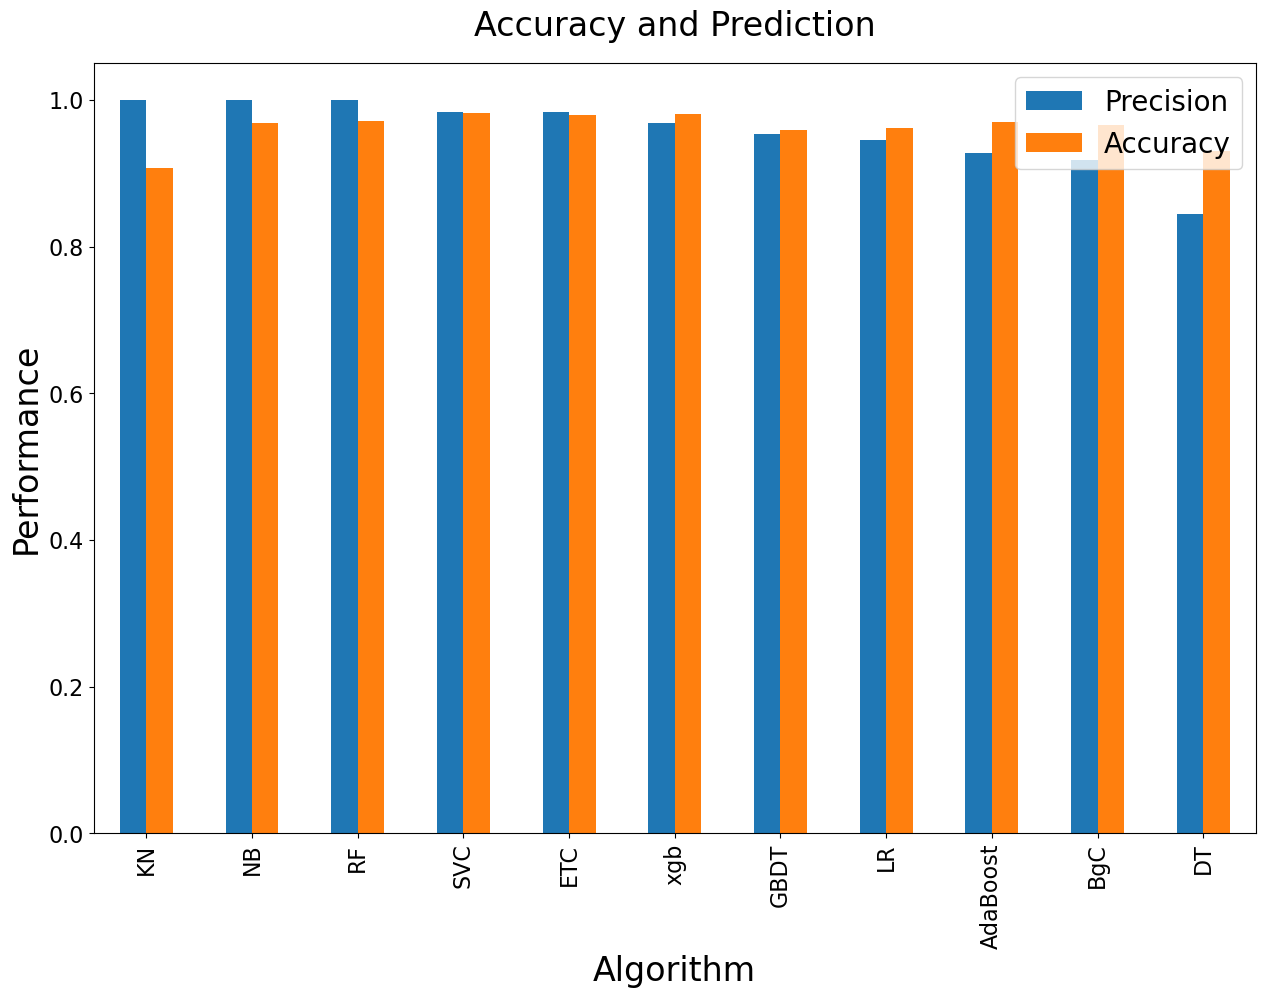

In [79]:
## Plotting the perfomrce of classifiers
ax3 = performance_df.plot(x="Algorithm", y=["Precision", "Accuracy"],kind="bar",figsize=(15, 10), fontsize=16)
ax3.set_title('Accuracy and Prediction',pad=20, fontdict={'fontsize':24})
ax3.set_ylabel('Performance', fontdict={'fontsize':24})
ax3.set_xlabel('Algorithm', fontdict={'fontsize':24})
ax3.legend(loc='upper right',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

#### Voter Classifier (Ensemble of the top 3 classifier)

**I have chosen Naive Bayes, Extra Tree classifier and SVC as top performing classifier based on the precision score**


In [80]:
from sklearn.ensemble import VotingClassifier

# group / ensemble of models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
estimator = [('svm', svc), ('MNB', mnb), ('ETC',etc)]





In [81]:
voting = VotingClassifier(estimator,voting='soft')

In [82]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('MNB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [83]:
y_pred5 = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred5))
print("Precision",precision_score(y_test,y_pred5))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [84]:
final_estimator=RandomForestClassifier()

In [85]:
from sklearn.ensemble import StackingClassifier

In [86]:
clf = StackingClassifier(estimators=estimator, final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred6 = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred6))
print("Precision",precision_score(y_test,y_pred6))


Accuracy 0.9854932301740812
Precision 0.9694656488549618


## Model export

In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

## Adding URL based testing for the link provided

In [2]:
## Converting JSON to csv files
import pandas as pd
json_file_path = r'C:\Users\Rajesh kalavala\Downloads\Streamlit\suspicious-list.json'
df = pd.read_json(json_file_path)
csv_file_path = r'C:\Users\Rajesh kalavala\Downloads\Streamlit\suspicious.csv'
df.to_csv(csv_file_path, index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [3]:
import pandas as pd
json_file_path = r'C:\Users\Rajesh kalavala\Downloads\Streamlit\domain-list.json'
df = pd.read_json(json_file_path)
csv_file_path = r'C:\Users\Rajesh kalavala\Downloads\Streamlit\domain-list.csv'
df.to_csv(csv_file_path, index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [4]:
csv1 = pd.read_csv("suspicious.csv")
csv2 = pd.read_csv("domain-list.csv")

In [5]:
csv1.head()

,domains
0,0x1trade.com
1,0xmons.net
2,1337-skull.xyz
3,1984-redux.xyz
4,19irjnillkigersogb.ru


In [6]:
csv2.head()

,domains
0,1000-rewards.xyz
1,101nitro.com
2,1lnch.live
3,1month-premium.com
4,1nitro.club


## Combining both databases

In [8]:
combined_df = pd.concat([csv1, csv2], ignore_index=True)

In [16]:
combined_df.head()

,domains
0,0x1trade.com
1,0xmons.net
2,1337-skull.xyz
3,1984-redux.xyz
4,19irjnillkigersogb.ru


In [17]:
df.to_csv('combined.csv', index= False)


In [18]:
combined = pd.read_csv('combined.csv')

In [21]:
link_to_check = 'ziscord-wwk.xyz'
if link_to_check in combined['domains'].values:
    print("The link is present in the spam CSV file. It is a spam link.")
else:
    print("The link is not present in the spam CSV file. It is not a spam link.")

The link is present in the spam CSV file. It is a spam link.


In [25]:
import re
message = "Check out this link: https://ziscord-wwk.xyz/awesome"
url_pattern = r'https?://([a-zA-Z0-9.-]+)'
matched_links = re.findall(url_pattern, message)
if matched_links in combined['domains'].values:
    print("The link is present in the spam CSV file. It is a spam link.")
else:
    print("The link is not present in the spam CSV file. It is not a spam link.")
print(matched_links)

The link is present in the spam CSV file. It is a spam link.
['ziscord-wwk.xyz']
